<a href="https://colab.research.google.com/github/Jack1Hayes/passenger_predictor/blob/main/NN%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df = df = df[df.length_of_stay < 50]
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

#df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
mapping = {
    "Internet":1,
    "Mobile":0,
    }

df["sales_channel"] = df["sales_channel"].map(mapping)

In [ ]:
mapping = {
    "RoundTrip":0,
    "CircleTrip":1,
    "OneWay":2,
    }

df['trip_type'] = df['trip_type'].map(mapping)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
df["sales_channel"]= labelencoder.fit_transform(df["sales_channel"])


df = (pd.DataFrame(df))
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,0,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,0,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,0,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,1,0,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,0,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df = pd.get_dummies(df,prefix=['route'], columns = ['route'])
df = pd.get_dummies(df,prefix=['booking_origin'], columns = ['booking_origin'])
df = pd.get_dummies(df,prefix=['flight_day'], columns = ['flight_day'])
normalized_df=(df-df.min())/(df.max()-df.min())

df['purchase_lead'] = (df['purchase_lead'])/867.000000
df['length_of_stay'] = (df['length_of_stay'])/50
df['flight_hour'] = (df['flight_hour'])/23.00000
df['flight_durtion'] = (df['flight_duration'])/9.500000
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_Vanuatu,booking_origin_Vietnam,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,flight_durtion
0,2,1,0,0.302191,0.38,0.304348,1,0,0,5.52,...,0,0,0,0,1,0,0,0,0,0.581053
1,1,1,0,0.129181,0.40,0.130435,0,0,0,5.52,...,0,0,0,0,1,0,0,0,0,0.581053
2,2,1,0,0.280277,0.44,0.739130,1,1,0,5.52,...,0,0,0,0,0,0,0,0,1,0.581053
3,1,1,0,0.110727,0.62,0.173913,0,0,1,5.52,...,0,0,0,0,1,0,0,0,0,0.581053
4,2,1,0,0.078431,0.44,0.652174,1,0,1,5.52,...,0,0,0,0,0,0,0,0,1,0.581053


In [ ]:
'''
from sklearn.compose import ColumnTransformer
#ct = ColumnTransformer([("route", OneHotEncoder(), [7])], remainder = 'passthrough')
#df["route"] = ct.fit_transform(df["route"])

onehotencoder.fit(df['route'].unique().reshape(-1, 1))

transformed = onehotencoder.transform(df['route'].to_numpy().reshape(-1, 1))
#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(transformed, columns=onehotencoder.get_feature_names())
#concat with original data
data = pd.concat([df, ohe_df], axis=1).drop(['route'], axis=1)

df.head()
'''

'\nfrom sklearn.compose import ColumnTransformer\n#ct = ColumnTransformer([("route", OneHotEncoder(), [7])], remainder = \'passthrough\')\n#df["route"] = ct.fit_transform(df["route"])\n\nonehotencoder.fit(df[\'route\'].unique().reshape(-1, 1))\n\ntransformed = onehotencoder.transform(df[\'route\'].to_numpy().reshape(-1, 1))\n#Create a Pandas DataFrame of the hot encoded column\nohe_df = pd.DataFrame(transformed, columns=onehotencoder.get_feature_names())\n#concat with original data\ndata = pd.concat([df, ohe_df], axis=1).drop([\'route\'], axis=1)\n\ndf.head()\n'

In [ ]:
cl = []
for i in df.columns:
  cl.append(i)

print(cl)

['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'route_AKLDEL', 'route_AKLHGH', 'route_AKLHND', 'route_AKLICN', 'route_AKLKIX', 'route_AKLKTM', 'route_AKLKUL', 'route_AKLMRU', 'route_AKLPEK', 'route_AKLPVG', 'route_AKLTPE', 'route_AORICN', 'route_AORKIX', 'route_AORKTM', 'route_AORMEL', 'route_AORPER', 'route_AORPUS', 'route_BBIMEL', 'route_BBIOOL', 'route_BBIPER', 'route_BBISYD', 'route_BDOCTS', 'route_BDOCTU', 'route_BDOHGH', 'route_BDOICN', 'route_BDOIKA', 'route_BDOKIX', 'route_BDOMEL', 'route_BDOOOL', 'route_BDOPEK', 'route_BDOPER', 'route_BDOPUS', 'route_BDOPVG', 'route_BDOSYD', 'route_BDOTPE', 'route_BDOWUH', 'route_BDOXIY', 'route_BKICKG', 'route_BKICTS', 'route_BKICTU', 'route_BKIDEL', 'route_BKIHND', 'route_BKIICN', 'route_BKIKIX', 'route_BKIKTM', 'route_BKIMEL', 'route_BKIMRU', 'route_BKIOOL', 'route_BKIPEK', 'route

In [ ]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,...,booking_origin_Vanuatu,booking_origin_Vietnam,flight_day_Fri,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,flight_durtion
count,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,...,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000,44698.000000
mean,1.627634,0.882366,0.018882,0.101205,0.288378,0.396455,0.646942,0.294353,0.415388,7.246789,...,0.000022,0.006667,0.134100,0.162692,0.116001,0.132288,0.148553,0.153184,0.153184,0.762820
std,1.051234,0.322178,0.187421,0.106372,0.241265,0.235887,0.477926,0.455757,0.492794,1.483104,...,0.004730,0.081380,0.340763,0.369088,0.320229,0.338807,0.355651,0.360168,0.360168,0.156116
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491579
25%,1.000000,1.000000,0.000000,0.025375,0.100000,0.217391,0.000000,0.000000,0.000000,5.620000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.591579
50%,1.000000,1.000000,0.000000,0.061130,0.120000,0.391304,1.000000,0.000000,0.000000,7.420000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781053
75%,2.000000,1.000000,0.000000,0.137255,0.460000,0.565217,1.000000,1.000000,1.000000,8.830000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.929474
max,9.000000,1.000000,2.000000,1.000000,0.980000,1.000000,1.000000,1.000000,1.000000,9.500000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential, load_model
import numpy as np



In [ ]:
from sklearn.model_selection import train_test_split

Predictors=['num_passengers',	'sales_channel',	'trip_type',	'purchase_lead',	'length_of_stay',	'flight_hour',	'wants_extra_baggage',	'wants_preferred_seat',	'wants_in_flight_meals',	'flight_duration', 'route_AKLHGH', 'route_AKLHND', 'route_AKLICN', 'route_AKLKIX', 'route_AKLKTM', 'route_AKLKUL', 'route_AKLMRU', 'route_AKLPEK', 'route_AKLPVG', 'route_AKLTPE', 'route_AORICN', 'route_AORKIX', 'route_AORKTM', 'route_AORMEL', 'route_AORPER', 'route_AORPUS', 'route_BBIMEL', 'route_BBIOOL', 'route_BBIPER', 'route_BBISYD', 'route_BDOCTS', 'route_BDOCTU', 'route_BDOHGH', 'route_BDOICN', 'route_BDOIKA', 'route_BDOKIX', 'route_BDOMEL', 'route_BDOOOL', 'route_BDOPEK', 'route_BDOPER', 'route_BDOPUS', 'route_BDOPVG', 'route_BDOSYD', 'route_BDOTPE', 'route_BDOWUH', 'route_BDOXIY', 'route_BKICKG', 'route_BKICTS', 'route_BKICTU', 'route_BKIDEL', 'route_BKIHND', 'route_BKIICN', 'route_BKIKIX', 'route_BKIKTM', 'route_BKIMEL', 'route_BKIMRU', 'route_BKIOOL', 'route_BKIPEK', 'route_BKIPER', 'route_BKIPUS', 'route_BKIPVG', 'route_BKISYD', 'route_BKIXIY', 'route_BLRICN', 'route_BLRMEL', 'route_BLRPER', 'route_BLRSYD', 'route_BOMMEL', 'route_BOMOOL', 'route_BOMPER', 'route_BOMSYD', 'route_BTJJED', 'route_BTUCKG', 'route_BTUICN', 'route_BTUPER', 'route_BTUSYD', 'route_BTUWUH', 'route_BWNCKG', 'route_BWNDEL', 'route_BWNHGH', 'route_BWNIKA', 'route_BWNKTM', 'route_BWNMEL', 'route_BWNOOL', 'route_BWNPER', 'route_BWNSYD', 'route_BWNTPE', 'route_BWNWUH', 'route_CANDEL', 'route_CANIKA', 'route_CANMEL', 'route_CANMRU', 'route_CANOOL', 'route_CANPER', 'route_CANSYD', 'route_CCUMEL', 'route_CCUMRU', 'route_CCUOOL', 'route_CCUPER', 'route_CCUSYD', 'route_CCUTPE', 'route_CEBMEL', 'route_CEBOOL', 'route_CEBPER', 'route_CEBSYD', 'route_CGKCKG', 'route_CGKCTS', 'route_CGKCTU', 'route_CGKDEL', 'route_CGKHGH', 'route_CGKHND', 'route_CGKICN', 'route_CGKIKA', 'route_CGKJED', 'route_CGKKIX', 'route_CGKKTM', 'route_CGKMEL', 'route_CGKMRU', 'route_CGKOOL', 'route_CGKPEK', 'route_CGKPER', 'route_CGKPUS', 'route_CGKPVG', 'route_CGKSYD', 'route_CGKTPE', 'route_CGKWUH', 'route_CGKXIY', 'route_CKGCOK', 'route_CKGDPS', 'route_CKGHKT', 'route_CKGJHB', 'route_CKGKCH', 'route_CKGKNO', 'route_CKGLGK', 'route_CKGLOP', 'route_CKGMAA', 'route_CKGMEL', 'route_CKGMRU', 'route_CKGMYY', 'route_CKGOOL', 'route_CKGPEN', 'route_CKGPER', 'route_CKGPNH', 'route_CKGSBW', 'route_CKGSGN', 'route_CKGSIN', 'route_CKGSUB', 'route_CKGSYD', 'route_CKGTGG', 'route_CKGTRZ', 'route_CKGTWU', 'route_CMBCTS', 'route_CMBCTU', 'route_CMBHGH', 'route_CMBHND', 'route_CMBICN', 'route_CMBKIX', 'route_CMBMEL', 'route_CMBMRU', 'route_CMBOOL', 'route_CMBPEK', 'route_CMBPER', 'route_CMBPVG', 'route_CMBSYD', 'route_CMBWUH', 'route_CNXDEL', 'route_CNXHND', 'route_CNXICN', 'route_CNXKIX', 'route_CNXMEL', 'route_CNXOOL', 'route_CNXPEK', 'route_CNXPER', 'route_CNXPUS', 'route_CNXPVG', 'route_CNXSYD', 'route_CNXTPE', 'route_CNXXIY', 'route_COKCTS', 'route_COKCTU', 'route_COKHGH', 'route_COKICN', 'route_COKKIX', 'route_COKMEL', 'route_COKOOL', 'route_COKPER', 'route_COKPUS', 'route_COKSYD', 'route_COKTPE', 'route_COKWUH', 'route_CRKMEL', 'route_CRKOOL', 'route_CRKSYD', 'route_CSXMRU', 'route_CSXPER', 'route_CSXSYD', 'route_CTSDMK', 'route_CTSDPS', 'route_CTSHKT', 'route_CTSJHB', 'route_CTSJOG', 'route_CTSKBR', 'route_CTSKCH', 'route_CTSKNO', 'route_CTSLGK', 'route_CTSMEL', 'route_CTSMYY', 'route_CTSOOL', 'route_CTSPEN', 'route_CTSPER', 'route_CTSSBW', 'route_CTSSGN', 'route_CTSSIN', 'route_CTSSUB', 'route_CTSSYD', 'route_CTUDMK', 'route_CTUDPS', 'route_CTUHKT', 'route_CTUIKA', 'route_CTUJHB', 'route_CTUKBR', 'route_CTUKBV', 'route_CTUKCH', 'route_CTUKNO', 'route_CTULGK', 'route_CTULOP', 'route_CTUMAA', 'route_CTUMEL', 'route_CTUMLE', 'route_CTUMRU', 'route_CTUMYY', 'route_CTUOOL', 'route_CTUPEN', 'route_CTUPER', 'route_CTUREP', 'route_CTUSBW', 'route_CTUSGN', 'route_CTUSIN', 'route_CTUSRG', 'route_CTUSUB', 'route_CTUSYD', 'route_CTUTGG', 'route_CTUTRZ', 'route_CTUTWU', 'route_CTUURT', 'route_CXRMEL', 'route_DACHND', 'route_DACICN', 'route_DACKIX', 'route_DACMEL', 'route_DACMRU', 'route_DACOOL', 'route_DACPEK', 'route_DACPER', 'route_DACPUS', 'route_DACSYD', 'route_DACTPE', 'route_DADMEL', 'route_DADOOL', 'route_DADSYD', 'route_DELDMK', 'route_DELDPS', 'route_DELHKG', 'route_DELHKT', 'route_DELHND', 'route_DELJHB', 'route_DELJOG', 'route_DELKBR', 'route_DELKBV', 'route_DELKCH', 'route_DELKIX', 'route_DELKNO', 'route_DELLGK', 'route_DELMEL', 'route_DELMFM', 'route_DELMNL', 'route_DELMRU', 'route_DELMYY', 'route_DELOOL', 'route_DELPEN', 'route_DELPER', 'route_DELPNH', 'route_DELREP', 'route_DELRGN', 'route_DELSBW', 'route_DELSGN', 'route_DELSIN', 'route_DELSUB', 'route_DELSYD', 'route_DELSZX', 'route_DELURT', 'route_DMKHGH', 'route_DMKHND', 'route_DMKICN', 'route_DMKIKA', 'route_DMKKIX', 'route_DMKKTM', 'route_DMKMEL', 'route_DMKMRU', 'route_DMKOOL', 'route_DMKPEK', 'route_DMKPER', 'route_DMKPUS', 'route_DMKPVG', 'route_DMKSYD', 'route_DMKTPE', 'route_DPSHGH', 'route_DPSHND', 'route_DPSICN', 'route_DPSIKA', 'route_DPSKIX', 'route_DPSKTM', 'route_DPSMEL', 'route_DPSMRU', 'route_DPSOOL', 'route_DPSPEK', 'route_DPSPUS', 'route_DPSPVG', 'route_DPSSYD', 'route_DPSTPE', 'route_DPSWUH', 'route_DPSXIY', 'route_GOIKUL', 'route_GOIMEL', 'route_GOIOOL', 'route_GOIPER', 'route_GOISYD', 'route_HANKTM', 'route_HANMEL', 'route_HANOOL', 'route_HANPER', 'route_HANSYD', 'route_HDYHGH', 'route_HDYKIX', 'route_HDYKTM', 'route_HDYMEL', 'route_HDYOOL', 'route_HDYPEK', 'route_HDYPER', 'route_HDYPVG', 'route_HDYSYD', 'route_HDYTPE', 'route_HDYXIY', 'route_HGHHKT', 'route_HGHJHB', 'route_HGHJOG', 'route_HGHKBR', 'route_HGHKBV', 'route_HGHKCH', 'route_HGHKNO', 'route_HGHLGK', 'route_HGHLOP', 'route_HGHMAA', 'route_HGHMEL', 'route_HGHMRU', 'route_HGHMYY', 'route_HGHOOL', 'route_HGHPEN', 'route_HGHPER', 'route_HGHSBW', 'route_HGHSGN', 'route_HGHSIN', 'route_HGHSUB', 'route_HGHSYD', 'route_HGHTGG', 'route_HGHTRZ', 'route_HGHTWU', 'route_HKGIKA', 'route_HKGJED', 'route_HKGKTM', 'route_HKGMEL', 'route_HKGMRU', 'route_HKGOOL', 'route_HKGPER', 'route_HKGSYD', 'route_HKTHND', 'route_HKTICN', 'route_HKTIKA', 'route_HKTJED', 'route_HKTKIX', 'route_HKTKTM', 'route_HKTMEL', 'route_HKTMRU', 'route_HKTOOL', 'route_HKTPEK', 'route_HKTPER', 'route_HKTPUS', 'route_HKTPVG', 'route_HKTSYD', 'route_HKTTPE', 'route_HKTWUH', 'route_HKTXIY', 'route_HNDIKA', 'route_HNDJOG', 'route_HNDKBR', 'route_HNDKBV', 'route_HNDKCH', 'route_HNDKNO', 'route_HNDKTM', 'route_HNDLGK', 'route_HNDLOP', 'route_HNDMAA', 'route_HNDMEL', 'route_HNDMLE', 'route_HNDOOL', 'route_HNDPEN', 'route_HNDPER', 'route_HNDPNH', 'route_HNDREP', 'route_HNDRGN', 'route_HNDSBW', 'route_HNDSGN', 'route_HNDSIN', 'route_HNDSUB', 'route_HNDSYD', 'route_HNDTRZ', 'route_HYDMEL', 'route_HYDMRU', 'route_HYDOOL', 'route_HYDPER', 'route_HYDSYD', 'route_HYDWUH', 'route_ICNIKA', 'route_ICNJED', 'route_ICNJHB', 'route_ICNKBR', 'route_ICNKBV', 'route_ICNKCH', 'route_ICNKNO', 'route_ICNKTM', 'route_ICNLGK', 'route_ICNMAA', 'route_ICNMEL', 'route_ICNMLE', 'route_ICNMRU', 'route_ICNMYY', 'route_ICNOOL', 'route_ICNPEN', 'route_ICNPER', 'route_ICNREP', 'route_ICNRGN', 'route_ICNSBW', 'route_ICNSDK', 'route_ICNSGN', 'route_ICNSIN', 'route_ICNSUB', 'route_ICNSYD', 'route_ICNTGG', 'route_ICNTRZ', 'route_ICNVTE', 'route_ICNVTZ', 'route_IKAKCH', 'route_IKAKIX',  'route_IKAMEL', 'route_IKAMFM', 'route_IKAMNL', 'route_IKAOOL', 'route_IKAPEK', 'route_IKAPEN', 'route_IKAPER', 'route_IKAPUS', 'route_IKAPVG', 'route_IKASGN', 'route_IKASIN', 'route_IKASUB', 'route_IKASYD', 'route_IKASZX', 'route_IKATPE', 'route_JEDJOG', 'route_JEDKNO', 'route_JEDMEL', 'route_JEDMFM', 'route_JEDMNL', 'route_JEDPDG', 'route_JEDPEN', 'route_JEDSUB', 'route_JHBKIX', 'route_JHBKTM', 'route_JHBMEL', 'route_JHBMRU', 'route_JHBOOL', 'route_JHBPEK', 'route_JHBPUS', 'route_JHBPVG', 'route_JHBSYD', 'route_JHBTPE', 'route_JHBWUH', 'route_JHBXIY', 'route_JOGKIX', 'route_JOGKTM', 'route_JOGMEL', 'route_JOGOOL', 'route_JOGPER', 'route_JOGPVG', 'route_JOGSYD', 'route_JOGTPE', 'route_KBRKIX', 'route_KBRKTM', 'route_KBRMEL', 'route_KBROOL', 'route_KBRPEK', 'route_KBRPER', 'route_KBRPUS', 'route_KBRPVG', 'route_KBRSYD', 'route_KBRTPE', 'route_KBRWUH', 'route_KBRXIY', 'route_KBVKIX', 'route_KBVKTM', 'route_KBVMEL', 'route_KBVOOL', 'route_KBVPEK', 'route_KBVPER', 'route_KBVPUS', 'route_KBVPVG', 'route_KBVSYD', 'route_KBVTPE', 'route_KBVWUH', 'route_KBVXIY', 'route_KCHKIX', 'route_KCHKTM', 'route_KCHMEL', 'route_KCHOOL', 'route_KCHPEK', 'route_KCHPER', 'route_KCHPUS', 'route_KCHPVG', 'route_KCHSYD', 'route_KCHTPE', 'route_KCHWUH', 'route_KCHXIY', 'route_KHHMEL', 'route_KHHOOL', 'route_KHHPER', 'route_KHHSYD', 'route_KIXKNO', 'route_KIXKTM', 'route_KIXLBU', 'route_KIXLGK', 'route_KIXLOP', 'route_KIXLPQ', 'route_KIXMAA', 'route_KIXMEL', 'route_KIXMLE', 'route_KIXMRU', 'route_KIXMYY', 'route_KIXOOL', 'route_KIXPEN', 'route_KIXPER', 'route_KIXPNH', 'route_KIXREP', 'route_KIXRGN', 'route_KIXSBW', 'route_KIXSGN', 'route_KIXSIN', 'route_KIXSUB', 'route_KIXSYD', 'route_KIXTGG', 'route_KIXTRZ', 'route_KIXTWU', 'route_KLOMEL', 'route_KLOOOL', 'route_KLOSYD', 'route_KNOKTM', 'route_KNOMEL', 'route_KNOOOL', 'route_KNOPEK', 'route_KNOPER', 'route_KNOPUS', 'route_KNOPVG', 'route_KNOSYD', 'route_KNOTPE', 'route_KNOWUH', 'route_KNOXIY', 'route_KOSMEL', 'route_KOSOOL', 'route_KOSPEK', 'route_KOSSYD', 'route_KTMMEL', 'route_KTMMFM', 'route_KTMMYY', 'route_KTMPEN', 'route_KTMPER', 'route_KTMREP', 'route_KTMSGN', 'route_KTMSIN', 'route_KTMSUB', 'route_KTMSYD', 'route_KTMTPE', 'route_KTMTWU', 'route_KTMURT', 'route_KWLPER', 'route_LBUPER', 'route_LBUTPE', 'route_LGKMEL', 'route_LGKOOL', 'route_LGKPEK', 'route_LGKPER', 'route_LGKPUS', 'route_LGKPVG', 'route_LGKSYD', 'route_LGKTPE', 'route_LGKWUH', 'route_LGKXIY', 'route_LOPOOL', 'route_LOPPEK', 'route_LOPPER', 'route_LOPPVG', 'route_LOPSYD', 'route_LOPTPE', 'route_LOPXIY', 'route_LPQMEL', 'route_LPQOOL', 'route_LPQPER', 'route_LPQTPE', 'route_MAAMEL', 'route_MAAMRU', 'route_MAAOOL', 'route_MAAPER', 'route_MAAPVG', 'route_MAASYD', 'route_MAATPE', 'route_MAAWUH', 'route_MELMFM', 'route_MELMLE', 'route_MELMNL', 'route_MELMRU', 'route_MELMYY', 'route_MELNRT', 'route_MELPEK', 'route_MELPEN', 'route_MELPNH', 'route_MELPUS', 'route_MELPVG', 'route_MELREP', 'route_MELRGN', 'route_MELSBW', 'route_MELSGN', 'route_MELSIN', 'route_MELSUB', 'route_MELSWA', 'route_MELSZX', 'route_MELTGG', 'route_MELTPE', 'route_MELTRZ', 'route_MELTWU', 'route_MELURT', 'route_MELUTP', 'route_MELVTE', 'route_MELVTZ', 'route_MELWUH', 'route_MELXIY', 'route_MFMOOL', 'route_MFMPER', 'route_MFMSYD', 'route_MLEOOL', 'route_MLEPEK', 'route_MLEPER', 'route_MLEPVG', 'route_MLESYD', 'route_MLETPE', 'route_MNLMRU', 'route_MNLOOL', 'route_MNLPER', 'route_MNLSYD', 'route_MRUOOL', 'route_MRUPEK', 'route_MRUPEN', 'route_MRUPER', 'route_MRUPVG', 'route_MRUSGN', 'route_MRUSIN', 'route_MRUSUB', 'route_MRUSYD', 'route_MRUSZX', 'route_MRUTPE', 'route_MRUXIY', 'route_MYYOOL', 'route_MYYPER', 'route_MYYPUS', 'route_MYYSYD', 'route_MYYXIY', 'route_NRTSYD', 'route_OOLPEK', 'route_OOLPEN', 'route_OOLPNH', 'route_OOLPUS', 'route_OOLPVG', 'route_OOLREP', 'route_OOLRGN', 'route_OOLSBW', 'route_OOLSDK', 'route_OOLSGN', 'route_OOLSIN', 'route_OOLSUB', 'route_OOLSZX', 'route_OOLTGG', 'route_OOLTPE', 'route_OOLTRZ', 'route_OOLTWU', 'route_OOLURT', 'route_OOLUTP', 'route_OOLVTE', 'route_OOLXIY', 'route_PEKPEN', 'route_PEKPER', 'route_PEKREP', 'route_PEKRGN', 'route_PEKSBW', 'route_PEKSGN', 'route_PEKSIN', 'route_PEKSUB', 'route_PEKSYD', 'route_PEKTGG', 'route_PEKTRZ', 'route_PEKTWU', 'route_PENPER', 'route_PENPUS', 'route_PENPVG', 'route_PENSYD', 'route_PENTPE', 'route_PENWUH', 'route_PENXIY', 'route_PERPNH', 'route_PERPUS', 'route_PERPVG', 'route_PERREP', 'route_PERRGN', 'route_PERSBW', 'route_PERSDK', 'route_PERSGN', 'route_PERSIN', 'route_PERSUB', 'route_PERSWA', 'route_PERSZX', 'route_PERTGG', 'route_PERTPE', 'route_PERTRZ', 'route_PERTWU', 'route_PERUTP', 'route_PERVTE', 'route_PERVTZ', 'route_PERWUH', 'route_PERXIY', 'route_PNHSYD', 'route_PNHTPE', 'route_PNKTPE', 'route_PUSRGN', 'route_PUSSBW', 'route_PUSSGN', 'route_PUSSIN', 'route_PUSSUB', 'route_PUSSYD', 'route_PUSTRZ', 'route_PVGREP', 'route_PVGRGN', 'route_PVGSGN', 'route_PVGSIN', 'route_PVGSUB', 'route_PVGSYD', 'route_PVGTGG', 'route_PVGTWU', 'route_PVGURT', 'route_REPSYD', 'route_REPTPE', 'route_RGNSYD', 'route_RGNTPE', 'route_SBWSYD', 'route_SBWTPE', 'route_SBWWUH', 'route_SBWXIY', 'route_SDKSYD', 'route_SDKTPE', 'route_SGNSYD', 'route_SGNXIY', 'route_SINSYD', 'route_SINTPE', 'route_SINWUH', 'route_SINXIY', 'route_SRGTPE', 'route_SUBSYD', 'route_SUBTPE', 'route_SUBWUH', 'route_SUBXIY', 'route_SYDSZX', 'route_SYDTPE', 'route_SYDTRZ', 'route_SYDTWU', 'route_SYDVTE', 'route_SYDVTZ', 'route_SYDXIY', 'route_TGGTPE', 'route_TGGXIY', 'route_TPETRZ', 'route_TPETWU', 'route_TPEURT', 'route_TPEVTE', 'route_TRZXIY', 'route_TWUWUH', 'route_TWUXIY', 'route_URTXIY','booking_origin_Afghanistan', 'booking_origin_Algeria', 'booking_origin_Argentina', 'booking_origin_Australia', 'booking_origin_Austria', 'booking_origin_Bahrain', 'booking_origin_Bangladesh', 'booking_origin_Belarus', 'booking_origin_Belgium', 'booking_origin_Bhutan', 'booking_origin_Brazil', 'booking_origin_Brunei', 'booking_origin_Bulgaria', 'booking_origin_Cambodia', 'booking_origin_Canada', 'booking_origin_Chile', 'booking_origin_China', 'booking_origin_Colombia', 'booking_origin_Croatia', 'booking_origin_Cyprus', 'booking_origin_Czech Republic', 'booking_origin_Czechia', 'booking_origin_Denmark', 'booking_origin_Egypt', 'booking_origin_Estonia', 'booking_origin_Finland', 'booking_origin_France', 'booking_origin_Germany', 'booking_origin_Ghana', 'booking_origin_Gibraltar', 'booking_origin_Greece', 'booking_origin_Guam', 'booking_origin_Guatemala', 'booking_origin_Hong Kong', 'booking_origin_Hungary', 'booking_origin_India', 'booking_origin_Indonesia', 'booking_origin_Iran', 'booking_origin_Iraq', 'booking_origin_Ireland', 'booking_origin_Israel', 'booking_origin_Italy', 'booking_origin_Japan', 'booking_origin_Jordan', 'booking_origin_Kazakhstan', 'booking_origin_Kenya', 'booking_origin_Kuwait', 'booking_origin_Laos', 'booking_origin_Lebanon', 'booking_origin_Macau', 'booking_origin_Malaysia', 'booking_origin_Maldives', 'booking_origin_Malta', 'booking_origin_Mauritius', 'booking_origin_Mexico', 'booking_origin_Mongolia', 'booking_origin_Myanmar (Burma)', 'booking_origin_Nepal', 'booking_origin_Netherlands', 'booking_origin_New Caledonia', 'booking_origin_New Zealand', 'booking_origin_Nicaragua', 'booking_origin_Norfolk Island', 'booking_origin_Norway', 'booking_origin_Oman', 'booking_origin_Pakistan', 'booking_origin_Panama', 'booking_origin_Papua New Guinea', 'booking_origin_Paraguay', 'booking_origin_Peru', 'booking_origin_Philippines', 'booking_origin_Poland', 'booking_origin_Portugal', 'booking_origin_Qatar', 'booking_origin_Romania', 'booking_origin_Russia', 'booking_origin_Réunion', 'booking_origin_Saudi Arabia', 'booking_origin_Seychelles', 'booking_origin_Singapore', 'booking_origin_Slovakia', 'booking_origin_Slovenia', 'booking_origin_Solomon Islands', 'booking_origin_South Africa', 'booking_origin_South Korea', 'booking_origin_Spain', 'booking_origin_Sri Lanka', 'booking_origin_Svalbard & Jan Mayen', 'booking_origin_Sweden', 'booking_origin_Switzerland', 'booking_origin_Taiwan', 'booking_origin_Tanzania', 'booking_origin_Thailand', 'booking_origin_Timor-Leste', 'booking_origin_Tunisia', 'booking_origin_Turkey', 'booking_origin_Ukraine', 'booking_origin_United Arab Emirates', 'booking_origin_United Kingdom', 'booking_origin_United States', 'booking_origin_Vanuatu', 'booking_origin_Vietnam', 'flight_day_Fri', 'flight_day_Mon', 'flight_day_Sat', 'flight_day_Sun', 'flight_day_Thu', 'flight_day_Tue', 'flight_day_Wed']

TargetVariable = ['booking_complete']


X=df[Predictors].values
y=df[TargetVariable].values
### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(y_train)

[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


In [ ]:
!pip install tensorflow scikeras scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
dataset = df.values
# split into input (X) and output (Y) variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# larger model
def create_larger():
 # create model
 model = Sequential()
 model.add(Dense(10, input_shape=(912,), activation='relu'))
 model.add(Dense(5, activation='relu'))
 model.add(Dense(1, activation='exponential'))
 # Compile model
 model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'], class_weight = class_weights)
 return model


In [ ]:
from tensorflow.keras import datasets, layers, models


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Sequential()
model.add(Dropout(0.1, input_shape=(911,)))


model.add(Dense(30, activation='softmax',kernel_constraint=MaxNorm(3)))
#model.add(Dense(10, activation='softmax',kernel_constraint=MaxNorm(3)))
model.add(Dense(5, activation='softmax',kernel_constraint=MaxNorm(3)))
model.add(Dense(1, activation='sigmoid'))

from keras.optimizers import SGD
from sklearn.utils import class_weight
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

y_ints = [int(y) for y in y_train]
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(y_ints),
                                                 y = y_ints)




# Compile the model
model.compile(optimizer=opt, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

class_weights = dict(enumerate(class_weights))

#print(y_ints)
history = model.fit(X_train,y_train, epochs=300, 
                    validation_data=(X_test, y_test), shuffle = True, class_weight = class_weights)
#history = model.fit(X_train, y_train,  verbose = 2, validation_data = (X_test, y_test), class_weight=class_weights)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
1118/1118 [==============================] - 7s 6ms/step - loss: 0.7045 - accuracy: 0.1510 - val_loss: 0.7757 - val_accuracy: 0.1490
Epoch 2/300
1118/1118 [==============================] - 8s 7ms/step - loss: 0.6875 - accuracy: 0.1513 - val_loss: 0.7205 - val_accuracy: 0.1521
Epoch 3/300
1118/1118 [==============================] - 11s 10ms/step - loss: 0.6735 - accuracy: 0.4734 - val_loss: 0.6851 - val_accuracy: 0.6285
Epoch 4/300
1118/1118 [==============================] - 7s 6ms/step - loss: 0.6594 - accuracy: 0.6572 - val_loss: 0.6584 - val_accuracy: 0.6764
Epoch 5/300
1118/1118 [==============================] - 4s 3ms/step - loss: 0.6451 - accuracy: 0.6840 - val_loss: 0.6362 - val_accuracy: 0.6932
Epoch 6/300
1118/1118 [==============================] - 4s 3ms/step - loss: 0.6303 - accuracy: 0.6974 - val_loss: 0.6187 - val_accuracy: 0.6987
Epoch 7/300
1118/1118 [==============================] - 4s 4ms/step - loss: 0.6172 - accuracy: 0.7030 - val_loss: 0.6025 - val_

280/280 [==============================] - 0s 2ms/step
[[0.04552522]
 [0.67026216]
 [0.7415993 ]
 ...
 [0.8422796 ]
 [0.29321635]
 [0.8698072 ]]
280/280 [==============================] - 0s 2ms/step
0       0.045525
1       0.670262
2       0.741599
3       0.462079
4       0.271783
          ...   
8935    0.179376
8936    0.245862
8937    0.842280
8938    0.293216
8939    0.869807
Length: 8940, dtype: float64


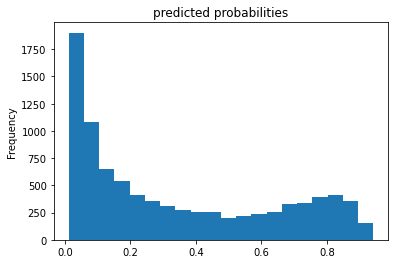

In [ ]:
result = model.predict(X_test)
print(result)

pred_dicts = list(model.predict(X_test))
probs = pd.Series([float(pred) for pred in pred_dicts])

print(probs)
probs.plot(kind='hist', bins=20, title='predicted probabilities')


In [ ]:
from numpy.lib.function_base import append
x = []
y = []
tot = []

for i in probs:
  if i > 0.5:
    x.append(i)
    tot.append(1)
  else:
    y.append(i)
    tot.append(0)
    

print(len(x), len(y))
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, tot))
print(metrics.confusion_matrix(y_test, tot))


2793 6147
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      7608
           1       0.32      0.67      0.43      1332

    accuracy                           0.74      8940
   macro avg       0.62      0.71      0.63      8940
weighted avg       0.84      0.74      0.77      8940

[[5709 1899]
 [ 438  894]]


colors_BA = ['#075AAA','#EB2226', '#EFE9E5','#B9CFED']

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color='#075AAA', label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color='#EB2226', label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
def plot_acc(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['accuracy'],
               color='#075AAA', label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_accuracy'],
               color='#EB2226', label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')


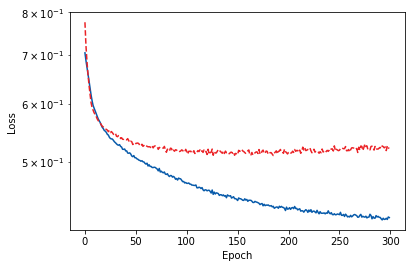

In [ ]:
plot_loss(history, "Zero Bias", 0)



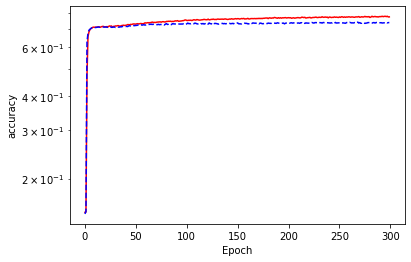

In [ ]:
plot_acc(history, "acc", 0)

In [ ]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_larger, epochs=1, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
def create_model():
    '''The function creates a Perceptron using Keras'''
    model = Sequential()
    model.add(Dense(10, input_dim=918, activation='sigmoid'))
    model.add(Dense(6, activation='sigmoid'))
    model.add(Dense(1, activation='softmax'))
    
    return model



estimator = create_model()
estimator.compile(optimizer = opt, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], loss='binary_crossentropy')
model1 = estimator.fit(X_train,y_train, batch_size=10 , epochs=20, verbose=1, shuffle=True, validation_data=(X_test, y_test), class_weight = class_weights)

In [ ]:
result = model.predict(X_test)
print(result)

pred_dicts = list(model.predict(X_test))
probs = pd.Series([float(pred) for pred in pred_dicts])

print(probs)
probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
classifier.add(Dropout(0.2, input_shape=(911,)))

classifier.add(Dense(units=10, kernel_initializer='uniform', activation='softmax', kernel_constraint=MaxNorm(3)))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='softmax', kernel_constraint=MaxNorm(3)))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measu1re the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
opt = keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=100, verbose=1, shuffle=True, class_weight = class_weights)


Epoch 1/100
3576/3576 [==============================] - 10s 2ms/step - loss: 0.6930 - accuracy: 0.1510
Epoch 2/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.6908 - accuracy: 0.6923
Epoch 3/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.6818 - accuracy: 0.6833
Epoch 4/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.6646 - accuracy: 0.7095
Epoch 5/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.6443 - accuracy: 0.7021
Epoch 6/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.6245 - accuracy: 0.7018
Epoch 7/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.6077 - accuracy: 0.6965
Epoch 8/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.5929 - accuracy: 0.7022
Epoch 9/100
3576/3576 [==============================] - 8s 2ms/step - loss: 0.5835 - accuracy: 0.6995
Epoch 10/100
3576/3576 [==============================] - 8s 2ms/step - 

In [ ]:


from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
 
# Generating the standardized values of X and y

Predictions=classifier.predict(X_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['booking_complete']=y_test
TestingData['PredictedbookProb']=Predictions
 
# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb > 0.5:
        return(1)
    else:
        return(0)
 
# Generating predictions on the testing data by applying probability threshold
TestingData['Predictedbook']=TestingData['PredictedbookProb'].apply(probThreshold)
print(TestingData.head())
 
###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['booking_complete'], TestingData['Predictedbook']))
print(metrics.confusion_matrix(TestingData['booking_complete'], TestingData['Predictedbook']))
print((TestingData['booking_complete'], TestingData['Predictedbook']))

280/280 [==============================] - 0s 1ms/step
   num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0       -0.597052      -2.738786  -0.100749      -0.246630       -0.863700   
1       -0.597052       0.365125  -0.100749      -0.832161        1.457428   
2        0.354222       0.365125  -0.100749      -0.756259       -0.863700   
3       -0.597052      -2.738786  -0.100749      -0.474336        0.379761   
4        0.354222      -2.738786  -0.100749      -0.669513       -0.863700   

   flight_hour  wants_extra_baggage  wants_preferred_seat  \
0     0.899767            -1.353659             -0.645863   
1    -0.206155             0.738738             -0.645863   
2    -0.390476             0.738738             -0.645863   
3    -0.390476             0.738738             -0.645863   
4     0.346806             0.738738              1.548315   

   wants_in_flight_meals  flight_duration  ...  flight_day_Fri  \
0               1.186334         1.067510  

280/280 [==============================] - 1s 2ms/step
[[0.16560106]
 [0.7004745 ]
 [0.7863938 ]
 ...
 [0.30614147]
 [0.37063318]
 [0.8313327 ]]
280/280 [==============================] - 0s 1ms/step
0       0.165601
1       0.700475
2       0.786394
3       0.728211
4       0.809647
          ...   
8935    0.202170
8936    0.324645
8937    0.306141
8938    0.370633
8939    0.831333
Length: 8940, dtype: float64


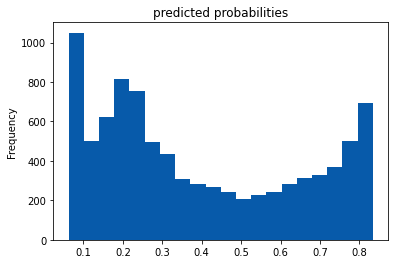

In [ ]:
result = classifier.predict(X_test)
print(result)

pred_dicts = list(classifier.predict(X_test))
probs = pd.Series([float(pred) for pred in pred_dicts])
colors_BA = ['#075AAA','#EB2226', '#EFE9E5','#B9CFED']
print(probs)
probs.plot(kind='hist', bins=20, title='predicted probabilities', color = colors_BA)

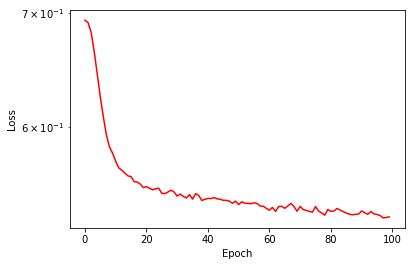

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color='r', label='Train ' + label)
  #plt.semilogy(history.epoch, history.history['accuracy'],
   #            color='b', label='Val ' + label,
    #           linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

plot_loss(survivalANN_Model, "Zero Bias", 0)